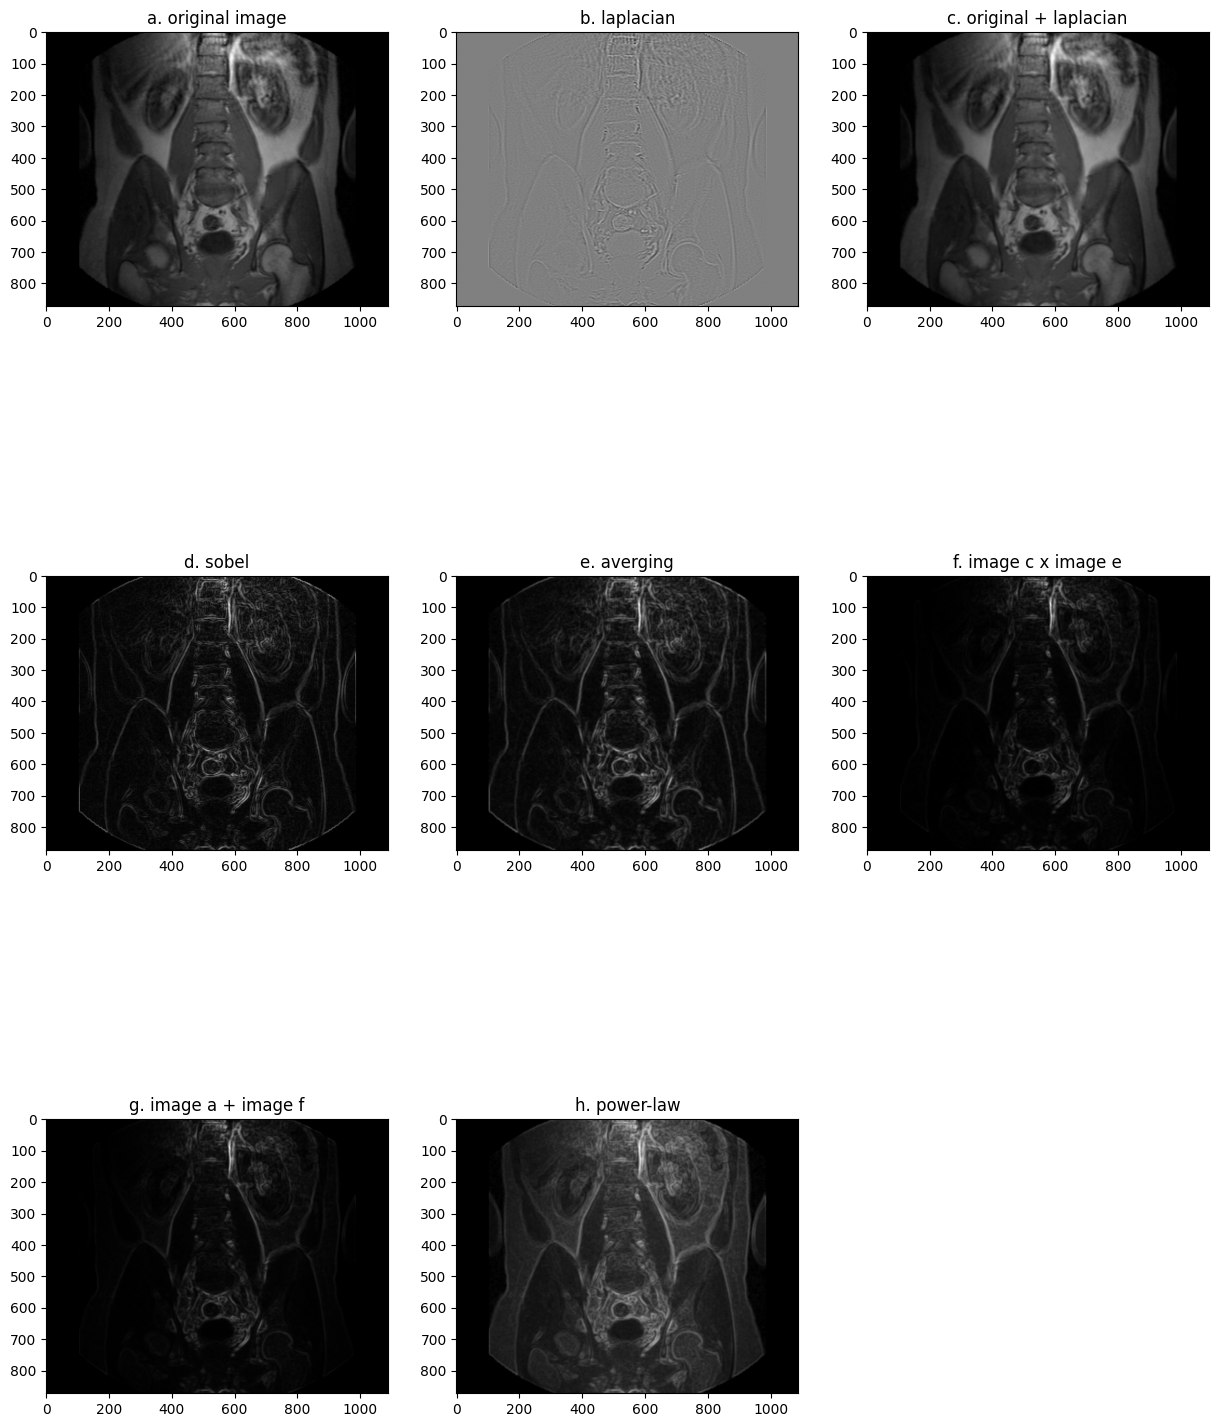

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#step a__load the image
image_a1= cv2.imread('XR.jpg')                                 #Load the image  
image_a = cv2.cvtColor(image_a1, cv2.COLOR_BGR2GRAY)                 #convert the image to gray scale    

#step b__Laplacian 
image_b1 = cv2.GaussianBlur(image_a, (5, 5), 0)                      
image_b = cv2.Laplacian(image_b1, cv2.CV_64F, ksize=1)               #apply laplacian filter

#step c__gray image from step a + laplacian from step b
image_c1 = image_a + image_b
image_c = np.uint64(np.absolute(image_c1)) 

#step d__sobel 
imagex_d = cv2.Sobel(image_a, cv2.CV_64F, 1, 0, ksize=1)             #horizontal sobel
imagey_d= cv2.Sobel(image_a, cv2.CV_64F, 0, 1, ksize=1)              #vertical sobel
image_d = cv2.magnitude(imagex_d, imagey_d)                          #horizontal+vertical sobel

#step e__5x5 averaging mask
avg_mask = np.ones((5, 5), np.float64) / 25                          #create 5x5 mask
image_e1 = cv2.filter2D(image_d, -1, avg_mask)                       #apply the mask
image_e = np.float64(np.absolute(image_e1)) 

#step f__(image from step c) x (image from step e)
image_f1 = image_c * image_e
image_f = np.uint64(np.absolute(image_f1)) 

#step g__(image from step a) + (image from step f)
image_g = image_a + image_f

#step h__power-law transformation
gamma = 0.5
image_h1 = 255.*((image_g/255.) ** gamma)
image_h = np.float64(np.absolute(image_h1)) 
    
#display
plt.figure(figsize=(15,20))    #configure image size
plt.subplot(331), plt.imshow(image_a, cmap='gray'), plt.title('a. original image')
plt.subplot(332), plt.imshow(image_b, cmap='gray'), plt.title('b. laplacian')
plt.subplot(333), plt.imshow(image_c, cmap='gray'), plt.title('c. original + laplacian')
plt.subplot(334), plt.imshow(image_d, cmap='gray'), plt.title('d. sobel')
plt.subplot(335), plt.imshow(image_e, cmap='gray'), plt.title('e. averging')
plt.subplot(336), plt.imshow(image_f, cmap='gray'), plt.title('f. image c x image e')
plt.subplot(337), plt.imshow(image_g, cmap='gray'), plt.title('g. image a + image f')
plt.subplot(338), plt.imshow(image_h, cmap='gray'), plt.title('h. power-law')

plt.show()